In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.fillna({'Postal Code':0}, inplace=True)

In [6]:
df['Postal Code'] = df['Postal Code'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
if df.duplicated().sum() > 0:
  print("yes")
else:
  print("no")

no


In [9]:
types_of_customers = df['Segment'].unique()

In [10]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Customer_Type'})

([<matplotlib.patches.Wedge at 0x7fc0f5d5d250>,
 [Text(-0.07082912490696024, 1.0977172837597642, 'Consumer'),
  Text(-0.5228074564626142, -0.9678183525161589, 'Corporate'),
  Text(0.9321462195039758, -0.5840406025820858, 'Home Office')],
 [Text(-0.03863406813106921, 0.5987548820507803, '52.1%'),
  Text(-0.28516770352506227, -0.5279009195542684, '30.1%'),
  Text(0.508443392456714, -0.3185676014084104, '17.8%')])

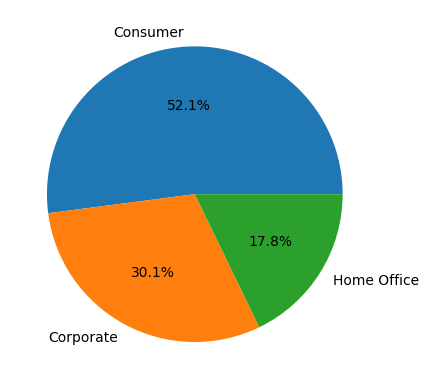

In [11]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Customer_Type'], autopct='%1.1f%%')

In [12]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment':'Customer_Type', 'Sales':'Total_Sales'})

<BarContainer object of 3 artists>

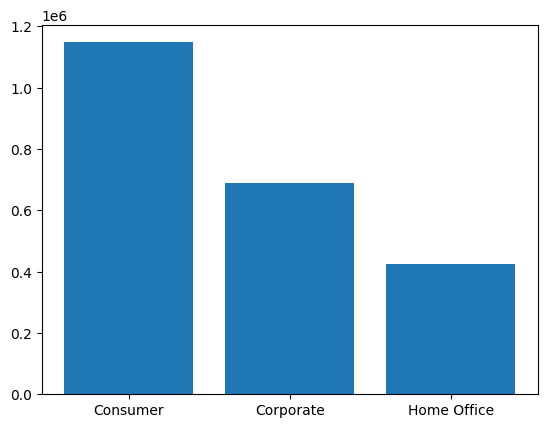

In [13]:
plt.bar(sales_per_segment['Customer_Type'], sales_per_segment['Total_Sales'])

([<matplotlib.patches.Wedge at 0x7fc0f6b56ba0>,
 [Text(-0.026420901678353936, 1.099682652384088, 'Consumer'),
  Text(-0.5902004249314667, -0.9282582929393717, 'Corporate'),
  Text(0.9138143750681164, -0.6123261287246105, 'Home Office')],
 [Text(-0.01441140091546578, 0.5998269013004115, '50.8%'),
  Text(-0.3219275045080727, -0.5063227052396572, '30.4%'),
  Text(0.49844420458260885, -0.3339960702134238, '18.8%')])

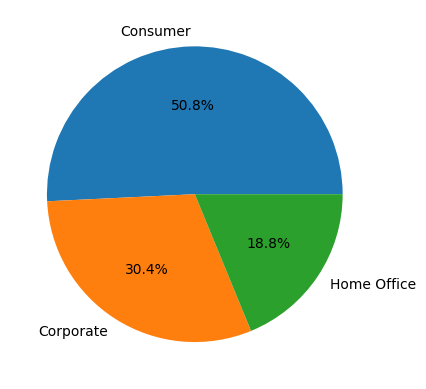

In [14]:
plt.pie(sales_per_segment['Total_Sales'], labels=sales_per_segment['Customer_Type'], autopct='%1.1f%%')

In [15]:
customers_order_freq = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()

In [16]:
customers_order_freq.rename(columns={'Order ID':'Total_Orders'}, inplace=True)

In [17]:
repeat_customers = customers_order_freq[customers_order_freq['Total_Orders'] >= 1]

In [18]:
repeat_customers_sorted = repeat_customers.sort_values(by='Total_Orders', ascending=False)

In [19]:
repeat_customers_sorted.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total_Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,SV-20365,Seth Vernon,Consumer,32
7,EP-13915,Emily Phan,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,AP-10915,Arthur Prichep,Consumer,31


In [20]:
customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().reset_index()

In [21]:
top_spenders = customer_sales.sort_values(by='Sales', ascending=False)
top_spenders

,Customer ID,Customer Name,Segment,Sales
700,SM-20320,Sean Miller,Home Office,25043.050
741,TC-20980,Tamara Chand,Corporate,19052.218
621,RB-19360,Raymond Buch,Consumer,15117.339
730,TA-21385,Tom Ashbrook,Home Office,14595.620
6,AB-10105,Adrian Barton,Consumer,14473.571
...,...,...,...,...
508,MG-18205,Mitch Gastineau,Corporate,16.739
145,CJ-11875,Carl Jackson,Corporate,16.520
681,SC-20845,Sung Chung,Consumer,14.112
456,LD-16855,Lela Donovan,Corporate,5.304


In [22]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index':'Use_Freq', 'Ship Mode':'Shipment_Mode'})
shipping_model

,Shipment_Mode,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


([<matplotlib.patches.Wedge at 0x7fc0f613f680>,
 [Text(-0.33286822443706726, 1.0484267953272248, 'Standard Class'),
  Text(-0.37327504859675137, -1.034729789894489, 'Second Class'),
  Text(0.7455147818297655, -0.8088310763523601, 'First Class'),
  Text(1.083680824088883, -0.18877465799741078, 'Same Day')],
 [Text(-0.18156448605658213, 0.5718691610875771, '59.8%'),
  Text(-0.20360457196186435, -0.5643980672151757, '19.4%'),
  Text(0.4066444264525993, -0.44118058710128727, '15.3%'),
  Text(0.5910986313212089, -0.10296799527131496, '5.5%')])

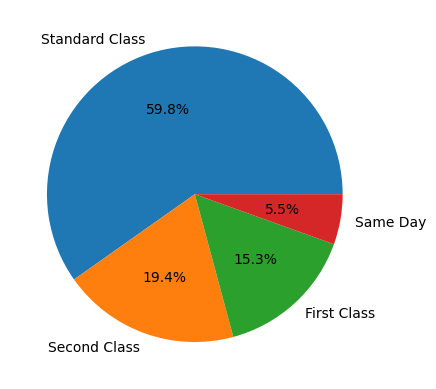

In [23]:
plt.pie(shipping_model['count'], labels=shipping_model['Shipment_Mode'], autopct='%1.1f%%')

In [24]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index':'state', 'State':'Number_of_Customers'})
state.head(10)

,Number_of_Customers,count
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [25]:
city = df['City'].value_counts().reset_index()
city.head(10)

,City,count
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [26]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()

In [27]:
top_sales = state_sales.sort_values(by='Sales', ascending=False)
top_sales.head(10).reset_index(drop=True)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [28]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()

In [29]:
top_city_sales = city_sales.sort_values(by='Sales', ascending=False)
top_city_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,252462.5470
1,Los Angeles,173420.1810
2,Seattle,116106.3220
3,San Francisco,109041.1200
4,Philadelphia,108841.7490
5,Houston,63956.1428
6,Chicago,47820.1330
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Detroit,42446.9440


In [30]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

In [31]:
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
subcategory_count

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [32]:
subcategory_count_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

In [33]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Sales', ascending=False)
subcategory_count_sales

,Category,Sub-Category,Sales
16,Technology,Phones,327782.4480
1,Furniture,Chairs,322822.7310
11,Office Supplies,Storage,219343.3920
3,Furniture,Tables,202810.6280
6,Office Supplies,Binders,200028.7850
15,Technology,Machines,189238.6310
13,Technology,Accessories,164186.7000
14,Technology,Copiers,146248.0940
0,Furniture,Bookcases,113813.1987
4,Office Supplies,Appliances,104618.4030


In [34]:
product_category = df.groupby('Category')['Sales'].sum().reset_index()
top_product_category = product_category.sort_values(by='Sales', ascending=False)
top_product_category.reset_index(drop=True)

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


In [35]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year', 'Sales':'Total_Sales'})
yearly_sales

,Year,Total_Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


<BarContainer object of 4 artists>

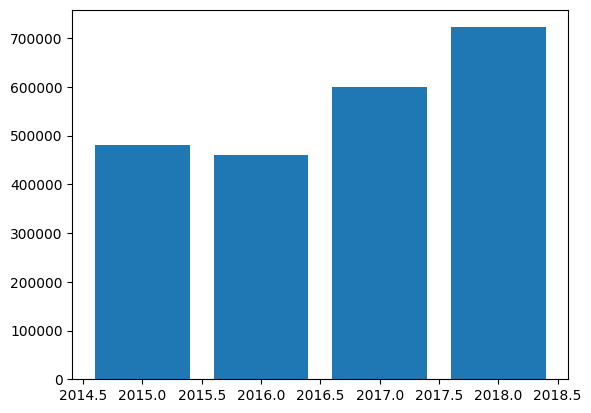

In [36]:
plt.bar(yearly_sales['Year'], yearly_sales['Total_Sales'])

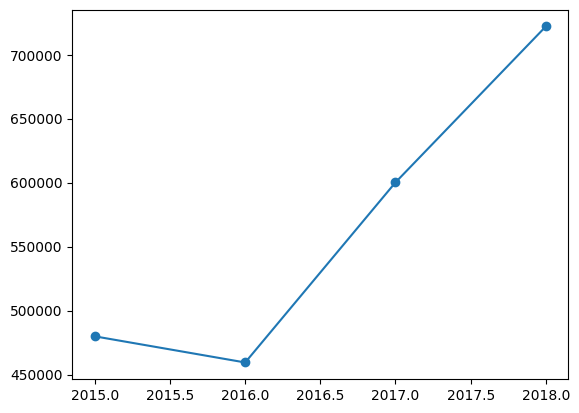

In [37]:
plt.plot(yearly_sales['Year'], yearly_sales['Total_Sales'], marker='o', linestyle='-')

In [38]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
quarterly_sales = yearly_sales.resample('QE', on='Order Date')['Sales'].sum()
quarterly_sales = quarterly_sales.reset_index()
quarterly_sales = quarterly_sales.rename(columns={'Order Date':'Quarter', 'Sales':'Total_Sales'})
quarterly_sales

,Quarter,Total_Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


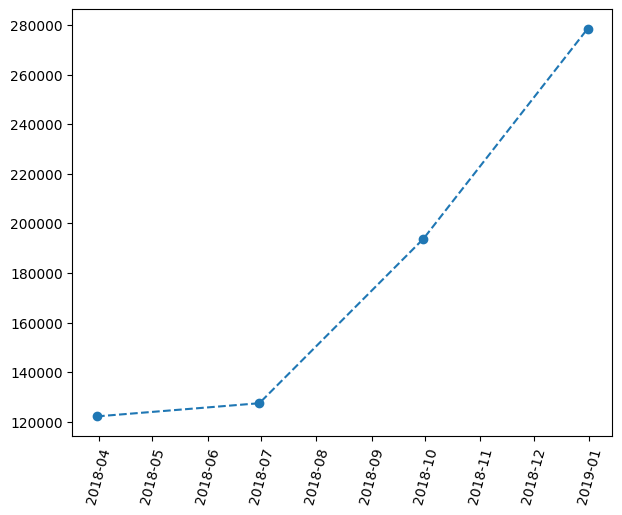

In [39]:
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total_Sales'], marker='o', linestyle='--')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
yearly_sales = df[df['Order Date'].dt.year == 2018]
monthly_sales = yearly_sales.resample('ME', on='Order Date')['Sales'].sum()
monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month', 'Sales':'Total_Sales'})
monthly_sales

,Month,Total_Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312


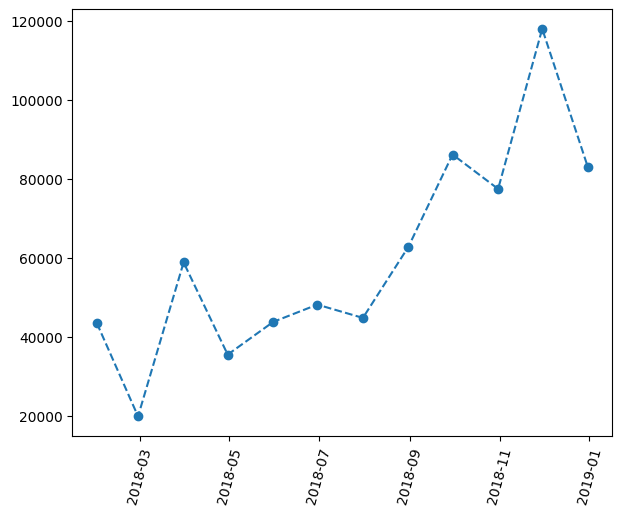

In [41]:
plt.plot(monthly_sales['Month'], monthly_sales['Total_Sales'], marker='o', linestyle='--')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

In [43]:
import plotly.express as px

df_summary = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

fig = px.sunburst(
  df_summary, path=['Category','Sub-Category'], values='Sales'
)

fig.show()

In [44]:
df_summary = df.groupby(['Category','Ship Mode','Sub-Category'])['Sales'].sum().reset_index()

fig = px.treemap(
  df_summary, path=['Category','Ship Mode','Sub-Category'], values='Sales'
)

fig.show()